In [25]:
import matplotlib.pyplot as plt
from IPython.display import display
import seaborn as sns
import numpy as np
import pandas as pd
import scipy.stats as stats
import math
%matplotlib inline

# Data Aquisition

## Data Loading

The data is split into six csv files. We load them all into panda DataFrames.

In [2]:
p = "data/"

# Load data in DataFrame
aisles = pd.read_csv(p + "aisles.csv")
departments = pd.read_csv(p + "departments.csv")
order_products_prior = pd.read_csv(p + "order_products__prior.csv")
order_products_train = pd.read_csv(p + "order_products__train.csv")
orders = pd.read_csv(p + "orders.csv")
products = pd.read_csv(p + "products.csv")

## Initial Preview of Data

Lets display the head of every table to understand what each table contains.

In [48]:
dfs = [aisles, departments, order_products_prior, order_products_train, orders, products]
names = ["aisles", "departments", "order_products_prior", "order_products_train", "orders", "products"]

for df, name in zip(dfs, names):
    print(f"Name: {name}\nSize: {df.shape}")
    display(df.info())
    display(df.head())
    print("\n\n")

Name: aisles
Size: (134, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


None

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation





Name: departments
Size: (21, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


None

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol





Name: order_products_prior
Size: (32434489, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434489 entries, 0 to 32434488
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int64
 3   reordered          int64
dtypes: int64(4)
memory usage: 989.8 MB


None

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0





Name: order_products_train
Size: (1384617, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1384617 entries, 0 to 1384616
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype
---  ------             --------------    -----
 0   order_id           1384617 non-null  int64
 1   product_id         1384617 non-null  int64
 2   add_to_cart_order  1384617 non-null  int64
 3   reordered          1384617 non-null  int64
dtypes: int64(4)
memory usage: 42.3 MB


None

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1





Name: orders
Size: (3421083, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3421083 entries, 0 to 3421082
Data columns (total 7 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   eval_set                object 
 3   order_number            int64  
 4   order_dow               int64  
 5   order_hour_of_day       int64  
 6   days_since_prior_order  float64
dtypes: float64(1), int64(5), object(1)
memory usage: 182.7+ MB


None

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0





Name: products
Size: (49688, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49688 entries, 0 to 49687
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49688 non-null  int64 
 1   product_name   49688 non-null  object
 2   aisle_id       49688 non-null  int64 
 3   department_id  49688 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


None

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


From the table information above, we can see that 

# Exploratory Data Analysis

In [118]:
def plot_hist(x, bins, bw, title, xlabel):
    """ Creates a histogram of x """
    sns.distplot(x, bins=bins, hist_kws=dict(ec="k"), kde_kws={"bw":bw})
    plt.title("Histogram of " + title)
    plt.xlabel(xlabel)
    plt.grid();

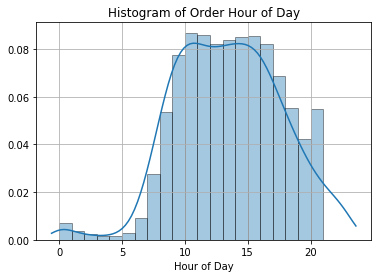

In [121]:
plot_hist(orders["order_hour_of_day"], range(0,22), .2, 
          "Order Hour of Day", "Hour of Day")

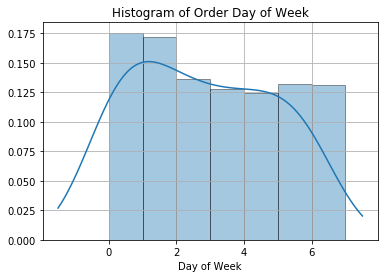

In [125]:
plot_hist(orders["order_dow"], range(0,8), .5, 
          "Order Day of Week", "Day of Week")